In [737]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Bussiness Understanding

Tujuan: Memprediksi harga rumah agar sesuai dengan keadaan sebenarnya.

Permasalahan: Belum ada standar penentuan harga rumah.

Kebutuhan: Data harga rumah sebelumnya.

In [738]:
# load data
df = pd.read_csv("House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [739]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [740]:
# ringkasan statistik yang numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [741]:
# ringkasan statistik yang kategorikal
data.describe(include='object').T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13320,1305,Whitefield,541
size,13320,31,2 BHK,5215
society,13320,2688,GrrvaGr,5582
total_sqft,13320,2117,1200,843


# Data Preparation

In [742]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [743]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,area_type,object,0,0.00,4,"[Super built-up Area, Plot Area, Built-up A..."
1,availability,object,0,0.00,81,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov..."
2,location,object,1,0.01,1305,"[Electronic City Phase II, Chikka Tirupathi, U..."
3,size,object,16,0.12,31,"[2 BHK, 4 Bedroom, 3 BHK, 4 BHK, 6 Bedroom, 3 ..."
4,society,object,5502,41.31,2688,"[Coomee , Theanmp, nan, Soiewre, DuenaTa, Jaad..."
5,total_sqft,object,0,0.00,2117,"[1056, 2600, 1440, 1521, 1200, 1170, 2732, 330..."
6,bath,float64,73,0.55,19,"[2.0, 5.0, 3.0, 4.0, 6.0, 1.0, 9.0, nan, 8.0, ..."
7,balcony,float64,609,4.57,4,"[1.0, 3.0, nan, 2.0, 0.0]"
8,price,float64,0,0.00,1994,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ..."


In [744]:
[features for features in df.columns if df[features].isnull().sum()>0]

['location', 'size', 'society', 'bath', 'balcony']

In [745]:
# menghitung banyak kolom yang unik
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [746]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [747]:
# menghitung banyak kolom yang unik
df['availability'].value_counts().head(5)

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: availability, dtype: int64

In [748]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [749]:
# menghitung banyak kolom yang unik
df['location'].value_counts().head(5)

Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: location, dtype: int64

In [750]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [751]:
# menghitung banyak kolom yang unik
df['size'].value_counts().head(5)

2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: size, dtype: int64

In [752]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Handle Data Inconsistent 

In [753]:
# Mengubah tipe data menjadi nilai dan tipe data yang sesuai
def convert_to_float(value):
  if ' - ' in value:
    start, end = map(float, value.split(' - '))
    return (start + end) / 2
  if 'Sq. Meter' in value:
    value = float(value.replace('Sq. Meter', ''))
    return value * 10.7639
  if 'Perch' in value:
    value = float(value.replace('Perch', ''))
    return value *  272.25
  if 'Sq. Yards' in value:
    value = float(value.replace('Sq. Yards', ''))
    return value *  9
  if 'Acres' in value:
    value = float(value.replace('Acres', ''))
    return value *  43560
  if 'Cents' in value:
    value = float(value.replace('Cents', ''))
    return value *  435.6
  if 'Guntha' in value:
    value = float(value.replace('Guntha', ''))
    return value *  1089
  if 'Grounds' in value:
    value = float(value.replace('Grounds', ''))
    return value *  2400.35
  else:
    return float(value)

In [754]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_float)

In [755]:
# Membuat kolom baru menjadi bedroom
def convert_to_total_bedroom(value):
  if value is not np.nan:
    if 'BHK' in value:
      value = value.replace('BHK', '')
      return float(value)
    if 'Bedroom' in value:
      value = value.replace('Bedroom', '')
      return float(value)
    else: # RK
      return 0

In [756]:
df['bedroom'] = df['size'].apply(convert_to_total_bedroom)

In [757]:
# Membuat kolom baru total_room berdasarkan size
def convert_to_total_room(value):
  if value is not np.nan:
    if 'BHK' in value:
      value = float(value.replace('BHK', ''))
      value += 2
      return value
    if 'Bedroom' in value:
      value = value.replace('Bedroom', '')
      return float(value)
    else: # RK
      return 2

In [758]:
df['total_room'] = df['size'].apply(convert_to_total_room)
df.drop('size', axis=1, inplace=True)

In [759]:
# mengambil baris dari kolom availability yang tidak siap 
not_ready = df[~df['availability'].isin(['Ready To Move', 'Immediate Possession'])].sort_values('availability', ascending=False)
not_ready

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,total_room
7769,Super built-up Area,22-Nov,Devanahalli,Sabixtt,1498.00,3.0,3.0,79.15,3.0,5.0
8211,Super built-up Area,22-Nov,Devanahalli,Sabixtt,1466.00,3.0,3.0,77.59,3.0,5.0
9369,Super built-up Area,22-May,Jakkur,SoineC,2249.81,4.0,2.0,245.00,4.0,6.0
2500,Super built-up Area,22-May,Jakkur,SoineC,3181.00,NaN,NaN,260.50,4.0,6.0
2949,Super built-up Area,22-May,Jakkur,SoineC,1452.19,2.0,1.0,100.00,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
3718,Built-up Area,15-Jun,Outer Ring Road East,SRzonhu,1500.00,2.0,0.0,97.00,3.0,5.0
7138,Built-up Area,15-Dec,1st Block Jayanagar,Bhsic C,1200.00,2.0,0.0,130.00,3.0,5.0
8981,Built-up Area,15-Aug,Yelahanka,Velas V,1225.00,2.0,2.0,62.00,2.0,4.0
3026,Built-up Area,14-Nov,Whitefield,NaN,1410.00,3.0,2.0,43.71,3.0,5.0


In [760]:
# mengambil baris dari kolom availability yang siap
def convert_to_boolean(value):
  if 'Ready To Move' in value:
    return 'Ready'
  if 'Immediate Possession' in value:
    return 'Ready'
  else:
    return 'Not Ready'

In [761]:
df['ready'] = df['availability'].apply(convert_to_boolean)

In [762]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,area_type,object,0,0.00,4,"[Super built-up Area, Plot Area, Built-up A..."
1,availability,object,0,0.00,81,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov..."
2,location,object,1,0.01,1305,"[Electronic City Phase II, Chikka Tirupathi, U..."
3,society,object,5502,41.31,2688,"[Coomee , Theanmp, nan, Soiewre, DuenaTa, Jaad..."
4,total_sqft,float64,0,0.00,2035,"[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170...."
5,bath,float64,73,0.55,19,"[2.0, 5.0, 3.0, 4.0, 6.0, 1.0, 9.0, nan, 8.0, ..."
6,balcony,float64,609,4.57,4,"[1.0, 3.0, nan, 2.0, 0.0]"
7,price,float64,0,0.00,1994,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ..."
8,bedroom,float64,16,0.12,20,"[2.0, 4.0, 3.0, 6.0, 1.0, 0.0, 8.0, 7.0, 5.0, ..."
9,total_room,float64,16,0.12,19,"[4.0, 5.0, 6.0, 3.0, 2.0, 1.0, 8.0, 7.0, 9.0, ..."


In [763]:
# mengisi nilai yang null dengan nilai mean (kolom numerik)
df['bath'].fillna(df['bath'].mean(), inplace=True)
df['balcony'].fillna(df['balcony'].mean(), inplace=True)
df['bedroom'].fillna(df['balcony'].mean(), inplace=True)
df['total_room'].fillna(df['balcony'].mean(), inplace=True)


# mengisi nilai yang null dengan nilai mean (kolom kategori)
# df['size'].fillna(df['size'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['society'].fillna(df['society'].mode()[0], inplace=True)

In [764]:
diskrit_data = [
  'bath',
  'balcony',
  'bedroom',
  'total_room',
  ]

for i in diskrit_data:
    df[i] = df[i].astype(np.int64)
    
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,area_type,object,0,0.0,4,"[Super built-up Area, Plot Area, Built-up A..."
1,availability,object,0,0.0,81,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov..."
2,location,object,0,0.0,1305,"[Electronic City Phase II, Chikka Tirupathi, U..."
3,society,object,0,0.0,2688,"[Coomee , Theanmp, GrrvaGr, Soiewre, DuenaTa, ..."
4,total_sqft,float64,0,0.0,2035,"[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170...."
5,bath,int64,0,0.0,19,"[2, 5, 3, 4, 6, 1, 9, 8, 7, 11, 10, 14, 27, 12..."
6,balcony,int64,0,0.0,4,"[1, 3, 2, 0]"
7,price,float64,0,0.0,1994,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ..."
8,bedroom,int64,0,0.0,20,"[2, 4, 3, 6, 1, 0, 8, 7, 5, 11, 9, 27, 10, 19,..."
9,total_room,int64,0,0.0,19,"[4, 5, 6, 3, 2, 1, 8, 7, 9, 13, 11, 29, 10, 12..."


In [765]:
# Membuat kolom baru yaitu price_per_sqft
df['price_per_sqft'] = df['price'] / df['total_sqft']

# Membuat kolom baru yaitu price_per_total_room untuk mempermudah perhitungan
df['price_per_total_room'] = df['price'] / df['total_room']

# Membuat kolom baru yaitu total_spaces
df['total_spaces'] = df['bath'] + df['total_room'] + df['balcony']

# Membuat kolom baru yaitu price_per_total_spaces
df['price_per_total_spaces'] = df['price'] / df['total_spaces']

In [766]:
# identifikasi data yang numerik
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df

,total_sqft,bath,balcony,price,bedroom,total_room,price_per_sqft,price_per_total_room,total_spaces,price_per_total_spaces
0,1056.0,2,1,39.07,2,4,0.036998,9.767500,7,5.581429
1,2600.0,5,3,120.00,4,4,0.046154,30.000000,12,10.000000
2,1440.0,2,3,62.00,3,5,0.043056,12.400000,10,6.200000
3,1521.0,3,1,95.00,3,5,0.062459,19.000000,9,10.555556
4,1200.0,2,1,51.00,2,4,0.042500,12.750000,7,7.285714
...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4,0,231.00,5,5,0.066898,46.200000,9,25.666667
13316,3600.0,5,1,400.00,4,6,0.111111,66.666667,12,33.333333
13317,1141.0,2,1,60.00,2,4,0.052585,15.000000,7,8.571429
13318,4689.0,4,1,488.00,4,6,0.104073,81.333333,11,44.363636


In [767]:
# identifikasi data yang kategorikal
cat_df = df.drop(num_df, axis = 1)
cat_df

,area_type,availability,location,society,ready
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,Not Ready
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,Ready
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,Ready
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,Ready
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,Ready
...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,Ready
13316,Super built-up Area,Ready To Move,Richards Town,GrrvaGr,Ready
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,Ready
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,Not Ready


In [768]:
# ringkasan statistik yang numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13320.0,1911.597417,17276.899537,1.000000,1100.000000,1277.250000,1680.000000,1.306800e+06
bath,13320.0,2.688814,1.338754,1.000000,2.000000,2.000000,3.000000,4.000000e+01
balcony,13320.0,1.557658,0.807639,0.000000,1.000000,2.000000,2.000000,3.000000e+00
price,13320.0,112.565627,148.971674,8.000000,50.000000,72.000000,120.000000,3.600000e+03
bedroom,13320.0,2.800601,1.297436,0.000000,2.000000,3.000000,3.000000,4.300000e+01
total_room,13320.0,4.419069,1.167764,1.000000,4.000000,4.000000,5.000000,4.300000e+01
price_per_sqft,13320.0,0.079021,1.062492,0.000023,0.042623,0.054286,0.073121,1.200000e+02
price_per_total_room,13320.0,25.715755,32.472551,2.000000,11.847500,16.750000,26.250000,6.666667e+02
total_spaces,13320.0,8.665541,2.607102,2.000000,7.000000,8.000000,10.000000,8.300000e+01
price_per_total_spaces,13320.0,12.515145,13.812935,1.000000,6.363636,8.750000,13.125000,2.888889e+02


In [769]:
# ringkasan statistik yang kategorikal
data.describe(include='object').T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13320,1305,Whitefield,541
size,13320,31,2 BHK,5215
society,13320,2688,GrrvaGr,5582
total_sqft,13320,2117,1200,843


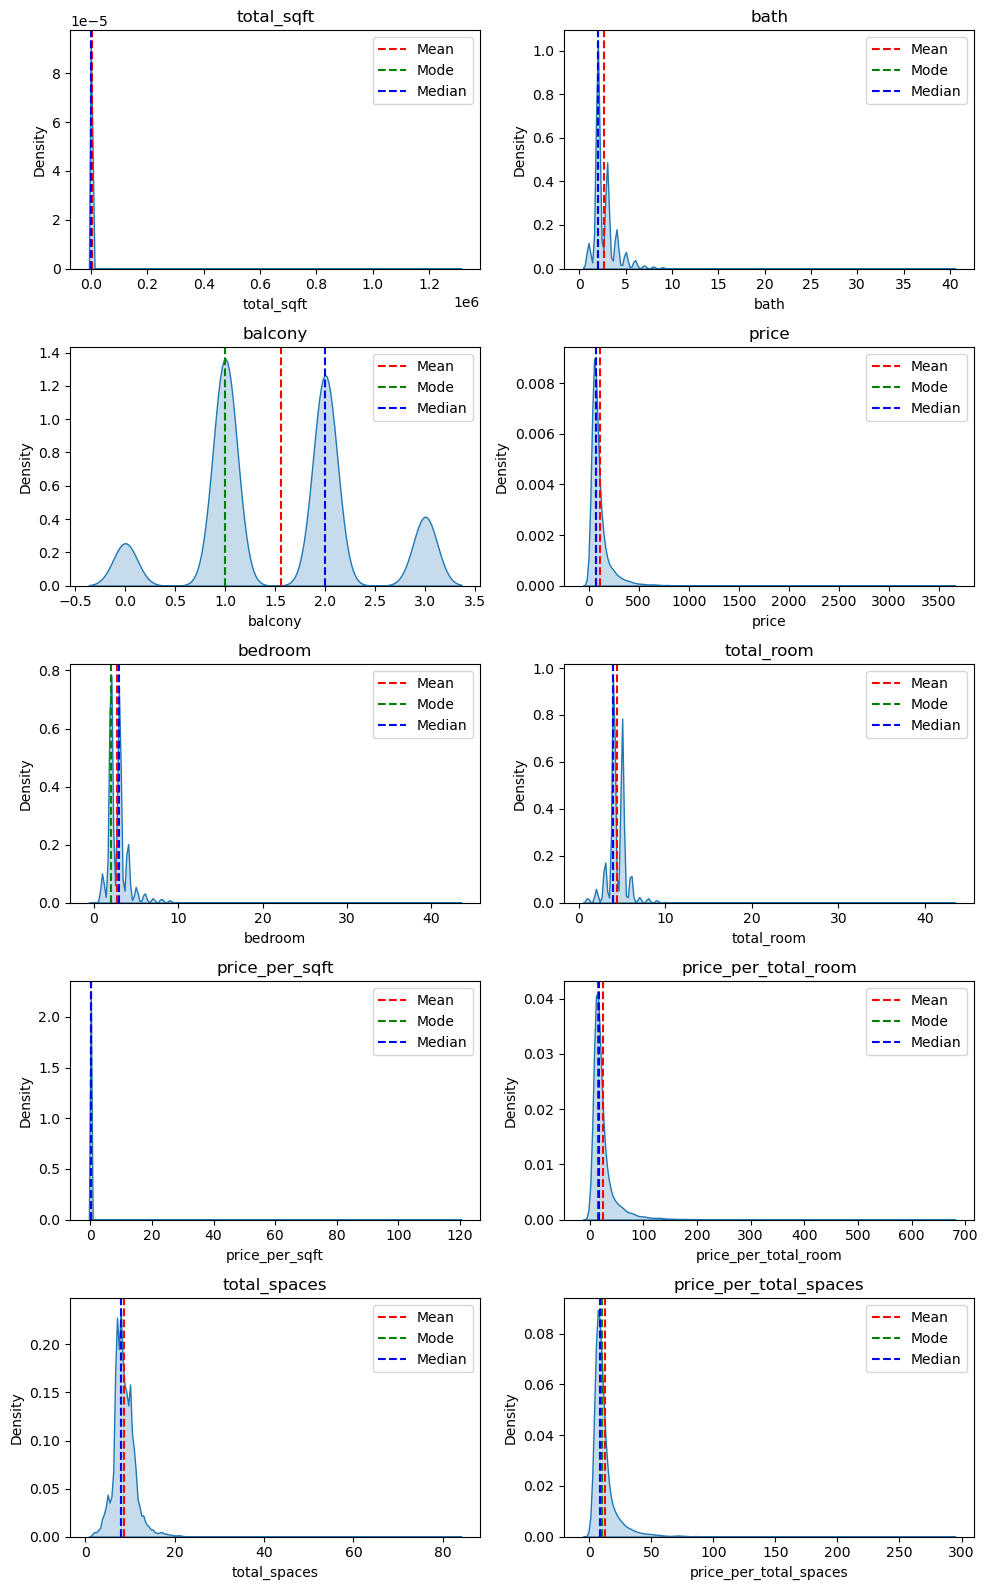

In [770]:
# distribusi data numerikal
fig, axes = plt.subplots(5, 2, figsize=(10, 16))
for i, attr in enumerate(num_df):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=num_df[attr], 
                ax=axes[row, col], 
                fill=True)
    axes[row, col].set_title(attr)

    mean_val = num_df[attr].mean()
    mode_val = num_df[attr].mode().iloc[0]
    median_val = num_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')
    axes[row, col].legend()
plt.tight_layout()
plt.show()

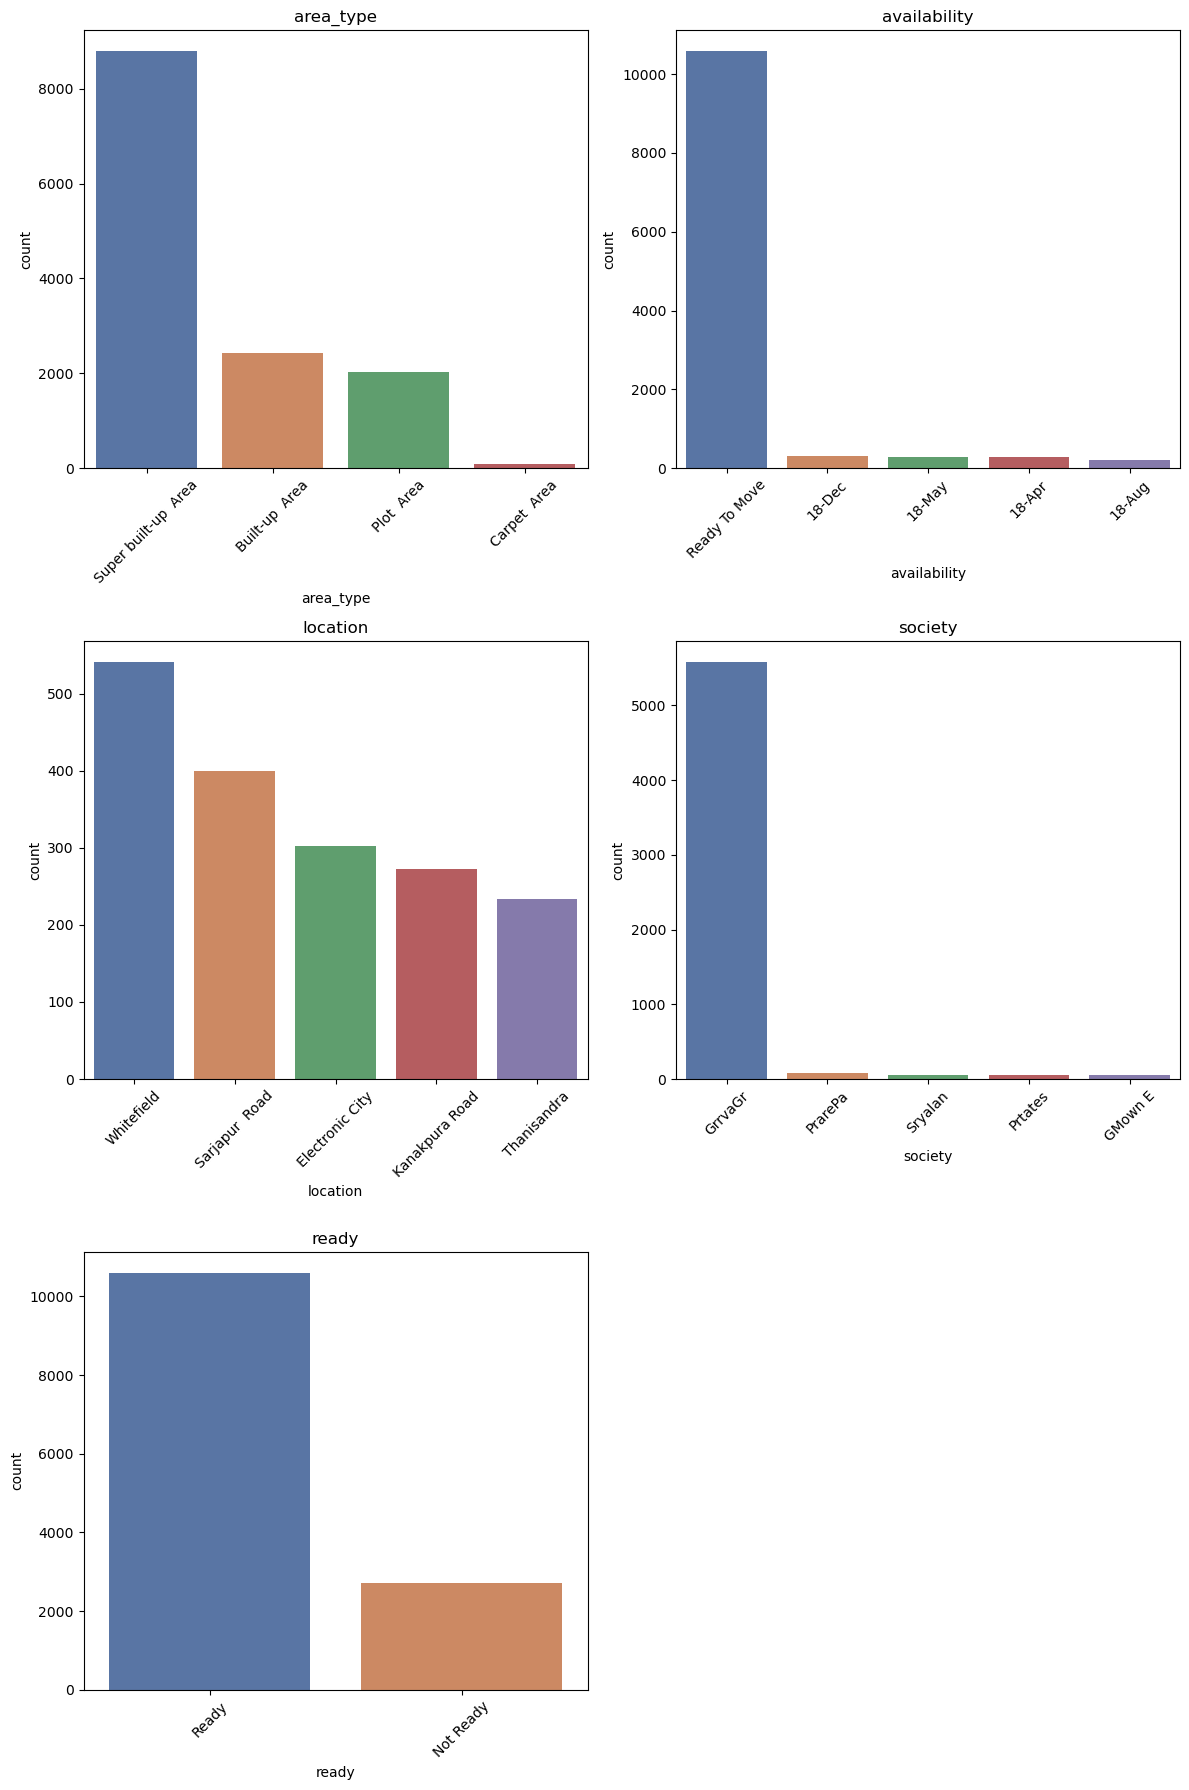

In [771]:
# distribusi data kategorikal
plt.figure(figsize=(12, 18))
for i, column in enumerate(cat_df):
    plt.subplot(3, 2, i+1)
    top_10_values = cat_df[column].value_counts().head(5)
    sns.countplot(data=cat_df, 
                  x=column,
                  palette='deep',
                  order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handle Outlier

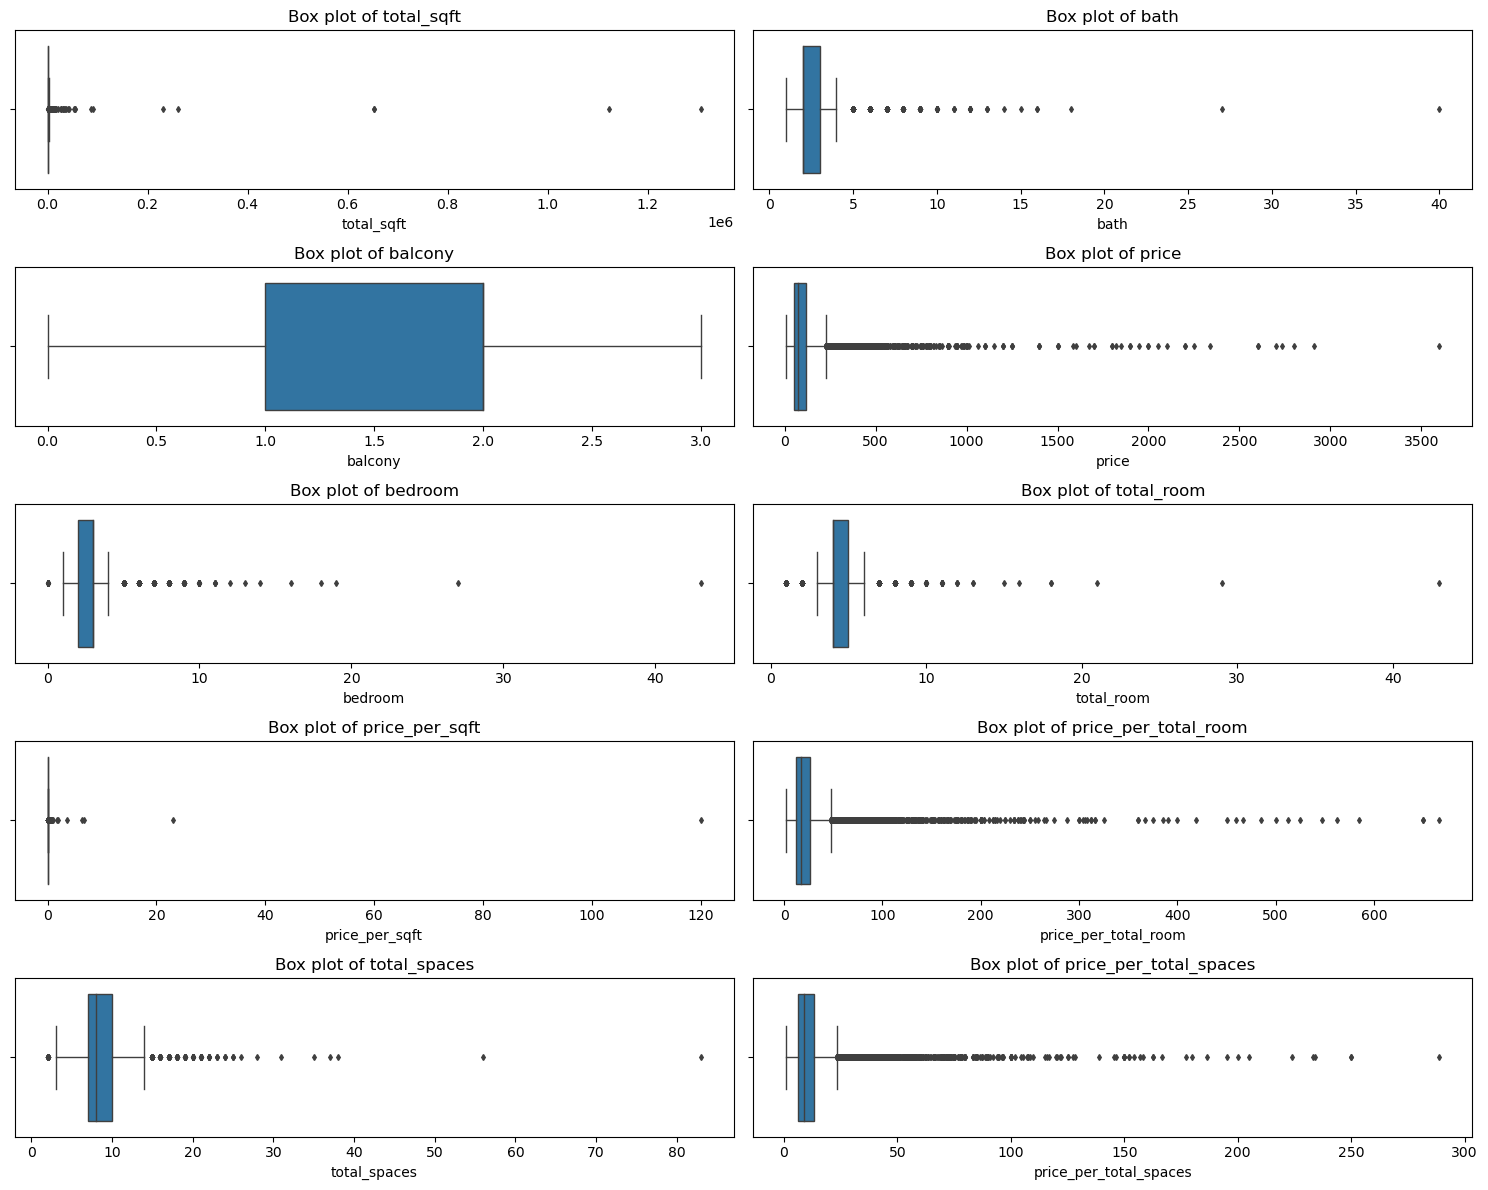

In [772]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()
numeric_columns = num_df.columns
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], orient='h', linewidth=1, fliersize=3, ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()  # Adjust layout
plt.show()

In [773]:
min = num_df.min()
max = num_df.max()
p5 = num_df.quantile(0.05)
q1 = num_df.quantile(0.25)
q2 = num_df.quantile(0.50)
q3 = num_df.quantile(0.75)
p95 = num_df.quantile(0.95)
iqr = q3-q1
low_limit = q1-(1.5*iqr)
upper_limit = q3+(1.5*iqr)

In [774]:
def describe(df):
  data = []
  for col in df.columns:
    data.append([col, \
                 low_limit[col], \
                 min[col], \
                 p5[col], \
                 q1[col], \
                 q2[col], \
                 q3[col], \
                 p95[col], \
                 max[col], \
                 upper_limit[col], \
                 ])
  return pd.DataFrame(columns=['kolom', 'll', 'min', 'p5', 'p25', 'p50', 'p75', 'p95', 'max', 'ul'], data=data)

In [775]:
def check_outlier(df):
  data = []
  for col in df.select_dtypes(include=['int64', 'float64']):
    data.append([col, \
                  df[(df[col] > upper_limit[col])][col].count(), \
                  df[(df[col] < low_limit[col])][col].count(), \
                  low_limit[col], \
                  upper_limit[col], \
                  ])
  return pd.DataFrame(columns=['kolom', 'upper limit count', 'lower limit count', 'lower limit', 'upper limit'], data=data)
check_outlier(df)

,kolom,upper limit count,lower limit count,lower limit,upper limit
0,total_sqft,1186,7,230.000000,2550.000000
1,bath,1039,0,0.500000,4.500000
2,balcony,0,0,-0.500000,3.500000
3,price,1276,0,-55.000000,225.000000
4,bedroom,846,13,0.500000,4.500000
5,total_room,358,463,2.500000,6.500000
6,price_per_sqft,1271,0,-0.003125,0.118869
7,price_per_total_room,1408,0,-9.756250,47.853750
8,total_spaces,326,59,2.500000,14.500000
9,price_per_total_spaces,1271,0,-3.778409,23.267045


In [776]:
df[
    (df['price_per_sqft'] >= df['price_per_sqft'].quantile(0.95)) &
    (df['price_per_total_spaces'] >= df['price_per_total_spaces'].quantile(0.95)) &
    (df['price_per_total_room'] >= df['price_per_total_room'].quantile(0.95))
      ]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,total_room,ready,price_per_sqft,price_per_total_room,total_spaces,price_per_total_spaces
7,Super built-up Area,Ready To Move,Rajaji Nagar,Brway G,3300.0,4,1,600.0,4,6,Ready,0.181818,100.000000,11,54.545455
159,Plot Area,Ready To Move,Mahalakshmi Layout,GrrvaGr,3750.0,4,0,760.0,4,4,Ready,0.202667,190.000000,8,95.000000
185,Plot Area,Ready To Move,8th block Koramangala,GrrvaGr,1846.0,3,2,300.0,3,3,Ready,0.162514,100.000000,8,37.500000
192,Plot Area,Ready To Move,Bellandur,GrrvaGr,1200.0,5,1,325.0,4,4,Ready,0.270833,81.250000,10,32.500000
324,Super built-up Area,Ready To Move,Rajaji Nagar,PhestOn,2390.0,3,2,415.0,3,5,Ready,0.173640,83.000000,10,41.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13200,Plot Area,Ready To Move,Defence Colony,GrrvaGr,8000.0,6,3,2800.0,6,6,Ready,0.350000,466.666667,15,186.666667
13213,Plot Area,Ready To Move,Rajarajeshwari nagar,GrrvaGr,1200.0,5,1,325.0,4,4,Ready,0.270833,81.250000,10,32.500000
13247,Plot Area,Ready To Move,5th Stage BEML Layout,GrrvaGr,1200.0,5,1,325.0,4,4,Ready,0.270833,81.250000,10,32.500000
13261,Plot Area,Ready To Move,Havanur extension,GrrvaGr,2000.0,2,2,360.0,3,3,Ready,0.180000,120.000000,7,51.428571


In [777]:
df = df[~(
    (df['price_per_sqft'] >= df['price_per_sqft'].quantile(0.95)) &
    (df['price_per_total_spaces'] >= df['price_per_total_spaces'].quantile(0.95)) &
    (df['price_per_total_room'] >= df['price_per_total_room'].quantile(0.95)) )]

In [778]:
df[~((df['total_sqft'] >= 100) & (df['total_sqft'] <= 10000))]
df = df[(df['bath'] <= 10)]

In [779]:
df[~(df['bath'] <= 10)]
df = df[(df['bath'] <= 10)]

In [780]:
df[~(df['bedroom'] <= 15)]
df = df[(df['bedroom'] <= 15)]

In [781]:
check_outlier(df)

,kolom,upper limit count,lower limit count,lower limit,upper limit
0,total_sqft,1044,7,230.000000,2550.000000
1,bath,921,0,0.500000,4.500000
2,balcony,0,0,-0.500000,3.500000
3,price,989,0,-55.000000,225.000000
4,bedroom,767,13,0.500000,4.500000
5,total_room,317,434,2.500000,6.500000
6,price_per_sqft,965,0,-0.003125,0.118869
7,price_per_total_room,1110,0,-9.756250,47.853750
8,total_spaces,291,55,2.500000,14.500000
9,price_per_total_spaces,974,0,-3.778409,23.267045


In [782]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,total_room,ready,price_per_sqft,price_per_total_room,total_spaces,price_per_total_spaces
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,4,Not Ready,0.036998,9.767500,7,5.581429
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,4,Ready,0.046154,30.000000,12,10.000000
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,1440.0,2,3,62.00,3,5,Ready,0.043056,12.400000,10,6.200000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,5,Ready,0.062459,19.000000,9,10.555556
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,1200.0,2,1,51.00,2,4,Ready,0.042500,12.750000,7,7.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4,0,231.00,5,5,Ready,0.066898,46.200000,9,25.666667
13316,Super built-up Area,Ready To Move,Richards Town,GrrvaGr,3600.0,5,1,400.00,4,6,Ready,0.111111,66.666667,12,33.333333
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2,1,60.00,2,4,Ready,0.052585,15.000000,7,8.571429
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689.0,4,1,488.00,4,6,Not Ready,0.104073,81.333333,11,44.363636


In [783]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,area_type,object,0,0.0,4,"[Super built-up Area, Plot Area, Built-up A..."
1,availability,object,0,0.0,81,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov..."
2,location,object,0,0.0,1270,"[Electronic City Phase II, Chikka Tirupathi, U..."
3,society,object,0,0.0,2661,"[Coomee , Theanmp, GrrvaGr, Soiewre, DuenaTa, ..."
4,total_sqft,float64,0,0.0,1988,"[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170...."
5,bath,int64,0,0.0,10,"[2, 5, 3, 4, 6, 1, 9, 8, 7, 10]"
6,balcony,int64,0,0.0,4,"[1, 3, 2, 0]"
7,price,float64,0,0.0,1921,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ..."
8,bedroom,int64,0,0.0,13,"[2, 4, 3, 6, 1, 0, 8, 7, 5, 11, 9, 10, 12]"
9,total_room,int64,0,0.0,13,"[4, 5, 6, 3, 2, 1, 8, 7, 9, 13, 11, 10, 12]"


In [784]:
df.to_csv("df_cleaned.csv", index=False, header=True)

# Exploratory Data Analysis (EDA)

In [785]:
# type data yang numerikal
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df

,total_sqft,bath,balcony,price,bedroom,total_room,price_per_sqft,price_per_total_room,total_spaces,price_per_total_spaces
0,1056.0,2,1,39.07,2,4,0.036998,9.767500,7,5.581429
1,2600.0,5,3,120.00,4,4,0.046154,30.000000,12,10.000000
2,1440.0,2,3,62.00,3,5,0.043056,12.400000,10,6.200000
3,1521.0,3,1,95.00,3,5,0.062459,19.000000,9,10.555556
4,1200.0,2,1,51.00,2,4,0.042500,12.750000,7,7.285714
...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4,0,231.00,5,5,0.066898,46.200000,9,25.666667
13316,3600.0,5,1,400.00,4,6,0.111111,66.666667,12,33.333333
13317,1141.0,2,1,60.00,2,4,0.052585,15.000000,7,8.571429
13318,4689.0,4,1,488.00,4,6,0.104073,81.333333,11,44.363636


In [786]:
# type data yang kategorikal
cat_df = df.drop(num_df, axis = 1)
cat_df

,area_type,availability,location,society,ready
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,Not Ready
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,Ready
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,Ready
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,Ready
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,Ready
...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,Ready
13316,Super built-up Area,Ready To Move,Richards Town,GrrvaGr,Ready
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,Ready
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,Not Ready


In [787]:
a = df['ready'].value_counts()
a = dict(a)
b = list(a.keys())
frequency = list(a.values())
fig = go.Figure()
fig.add_trace(go.Bar(
             y=b[0:10],
             x=frequency[0:10],
             orientation='h',
             name='Top 10 Rumah yang Tersedia',
             marker_color='red',
             text=frequency)
             )
fig.update_traces(textposition='inside')

In [788]:
avail = df['ready'].value_counts().reset_index()
fig = px.pie(avail, 
             values='ready', 
             names='index',
             title='Komposisi Untuk Ketersedian Rumah',
             hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [789]:
loc = df['location'].value_counts()
loc = dict(loc)
fig = go.Figure()
fig = px.bar(y= list(loc.keys())[0:10], 
            x=list(loc.values())[0:10],
            text=list(loc.values())[0:10],
            orientation='h',
            color=list(loc.values())[0:10],
            color_continuous_scale = 'Rainbow',
            title='Perbandingan Jumlah location Rumah')
fig.show()

In [790]:
loc = df['location'].value_counts().reset_index().head()
fig = px.pie(loc, values='location', names='index',title='Komposisi Untuk Ketersedian Lokasi',hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [791]:
areatype = df['area_type'].value_counts()
areatype = dict(areatype)
fig = go.Figure()
fig = px.bar(y= list(areatype.keys())[0:4], 
            x=list(areatype.values())[0:4],
            text=list(areatype.values())[0:4],
            orientation='h',
            color=list(areatype.values())[0:4],
            color_continuous_scale = 'hsv',
            title='Perbandingan Jumlah Area dan Type Rumah')
fig.show()

In [792]:
areatype = df['area_type'].value_counts().reset_index().head()
fig = px.pie(areatype, 
             values='area_type', 
             names='index',
             title='Komposisi Untuk Tipe Rumah',
             hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [793]:
areatype = df.groupby('area_type')['price'].aggregate('mean').reset_index()
fig = go.Figure() 
fig.add_trace(go.Scatter(x=areatype['area_type'].tolist(), 
                         y=areatype['price'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.show()

In [794]:
areatype = df.groupby('area_type')['price_per_sqft'].aggregate('mean').reset_index()
fig = go.Figure() 
fig.add_trace(go.Scatter(x=areatype['area_type'].tolist(), 
                         y=areatype['price_per_sqft'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.show()

In [795]:
areatype = df.groupby('area_type')['price_per_sqft'].aggregate('mean').reset_index()
fig = go.Figure() 
fig.add_trace(go.Scatter(x=areatype['area_type'].tolist(), 
                         y=areatype['price_per_sqft'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.show()

In [797]:
areatype = df.groupby('area_type')['price_per_total_room'].aggregate('mean').reset_index()
fig = go.Figure() 
fig.add_trace(go.Scatter(x=areatype['area_type'].tolist(), 
                         y=areatype['price_per_total_room'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.show()

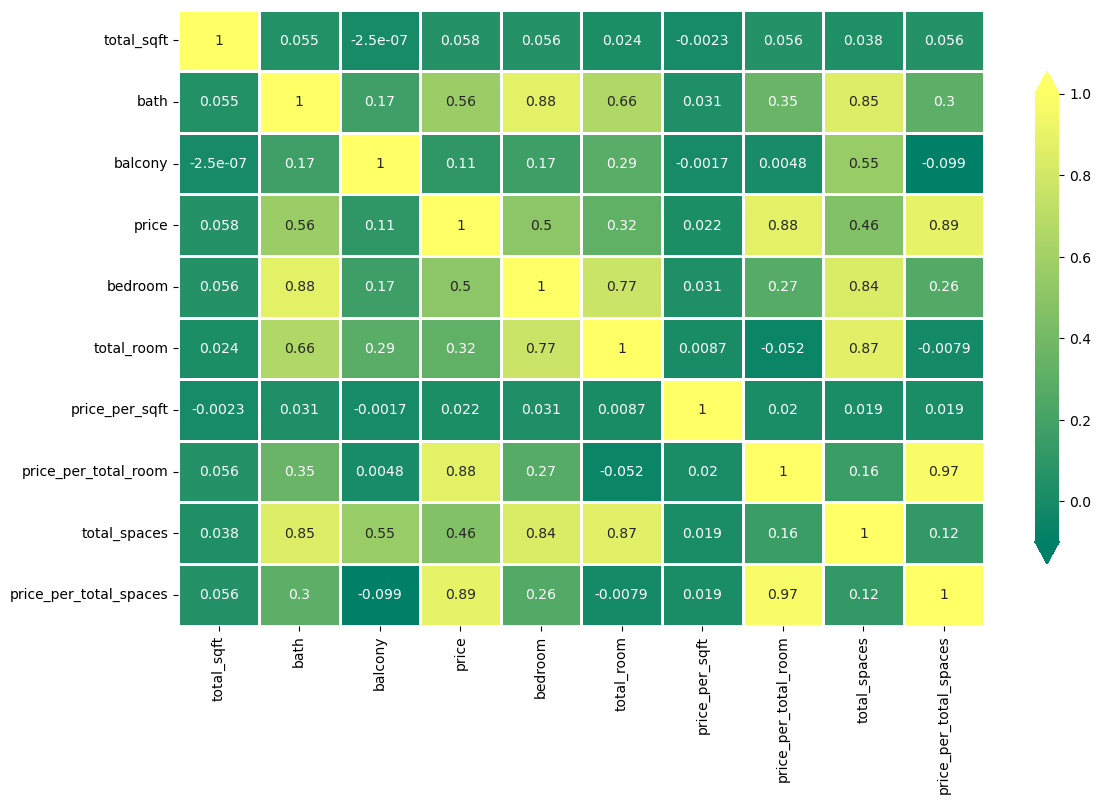

In [804]:
fig, ax = plt.subplots(figsize=(13, 8))
cbar_kws = {"shrink":.8,
           'extend':'both'}
sns.heatmap(df.corr(), 
            ax=ax, cmap='summer', linewidths=2, cbar_kws=cbar_kws, annot=True)
plt.show()

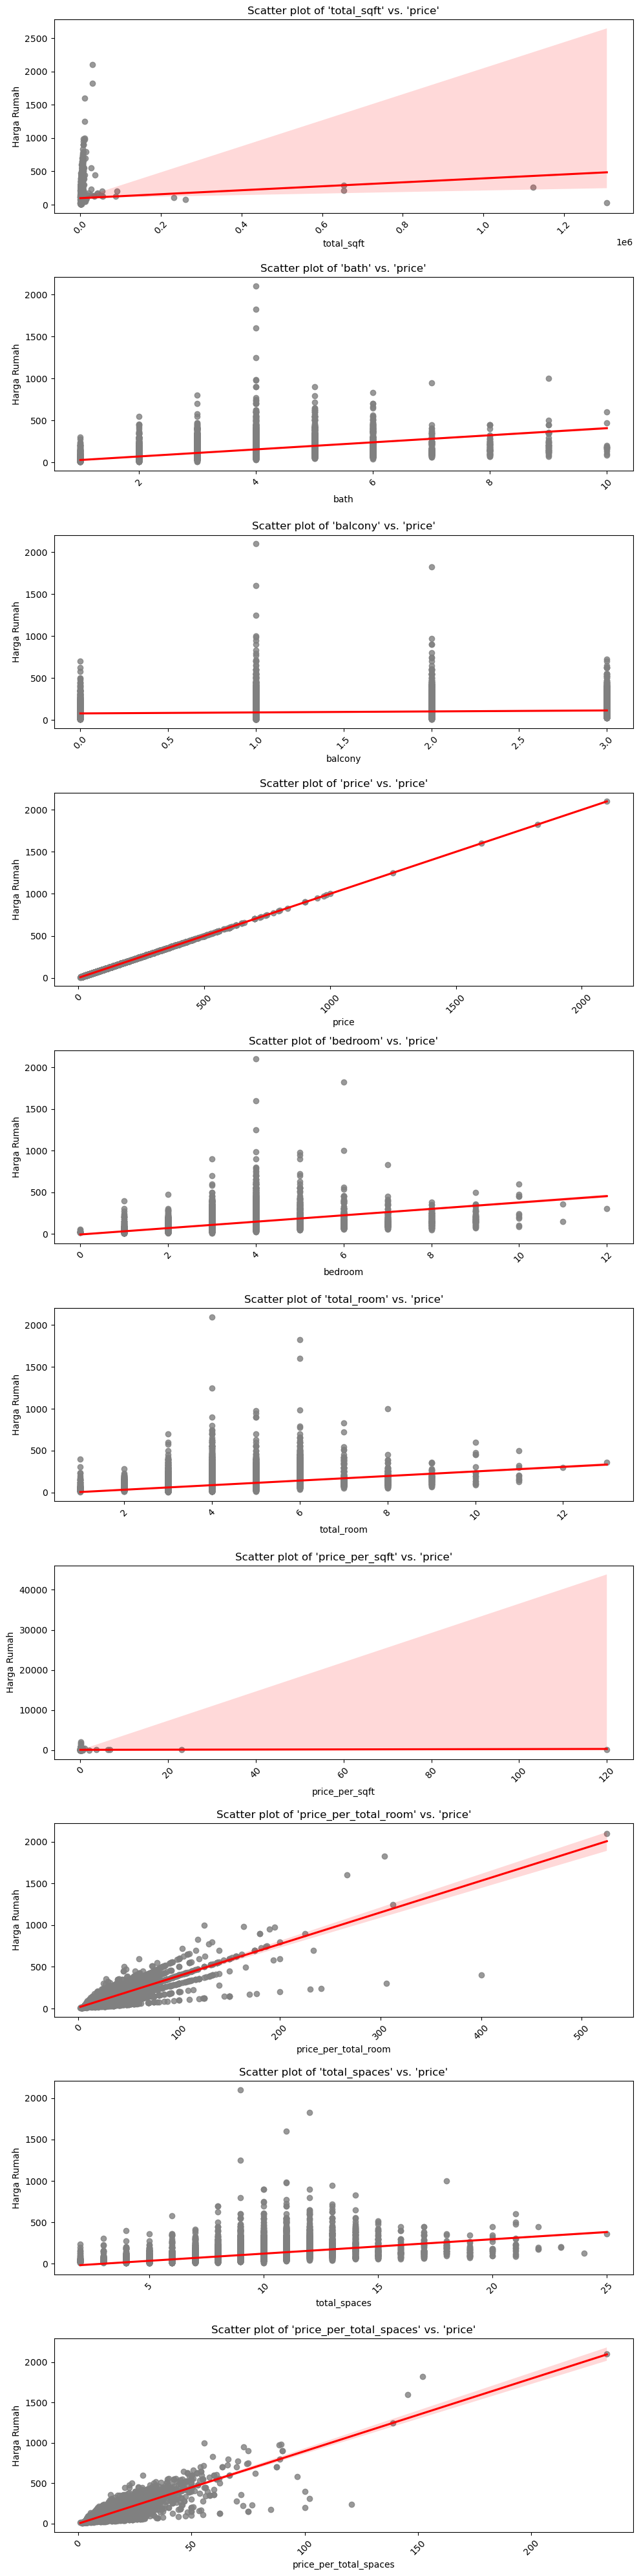

In [809]:
num_rows = 10
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 40))
axes = axes.flatten()

for i, column in enumerate(num_df.columns):
    sns.regplot(x=column,
                y='price',
                data=num_df,
                ax=axes[i],
                color='red',
                scatter_kws={'color': 'grey'})
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Harga Rumah')
    axes[i].set_title(f"Scatter plot of '{column}' vs. 'price'")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()